In [1]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

## Lecture 22 ##

In [2]:
births = Table.read_table('baby.csv')

In [3]:
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [4]:
babies = births.select('Birth Weight', 'Gestational Days')

In [5]:
babies = babies.with_column(
    'Ratio BW/GD', babies.column(0) / babies.column(1)
)

In [6]:
babies

Birth Weight,Gestational Days,Ratio BW/GD
120,284,0.422535
113,282,0.400709
128,279,0.458781
108,282,0.382979
136,286,0.475524
138,244,0.565574
132,245,0.538776
120,289,0.415225
143,299,0.478261
140,351,0.39886


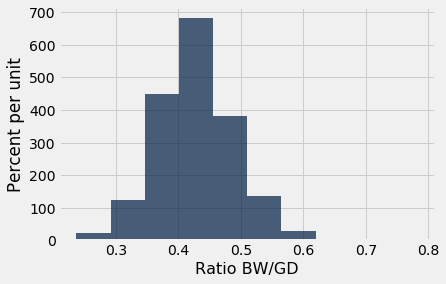

In [7]:
babies.hist('Ratio BW/GD')

In [8]:
babies.sort('Ratio BW/GD', descending = True)

Birth Weight,Gestational Days,Ratio BW/GD
116,148,0.783784
174,281,0.619217
174,284,0.612676
110,181,0.607735
174,288,0.604167
176,293,0.600683
158,267,0.59176
173,293,0.590444
160,271,0.590406
132,225,0.586667


In [9]:
percentile(50, babies.column('Ratio BW/GD'))

0.42907801418439717

In [10]:
# Bootstrap the sample median

medians = make_array()

for i in np.arange(5000):
    resample = babies.sample()
    resampled_median = percentile(50, resample.column('Ratio BW/GD'))
    medians = np.append(medians, resampled_median)

In [11]:
interval_95 = make_array(percentile(2.5, medians), percentile(97.5, medians))
interval_95

array([ 0.42545455,  0.43252595])

Approx 95% Confidence Interval for Median Ratio in Population:
[ 0.425  0.433]


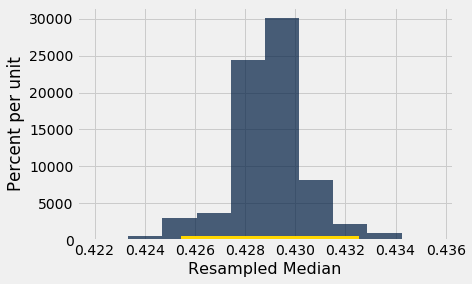

In [12]:
Table().with_column('Resampled Median', medians).hist()
plots.plot(interval_95, [0, 0], color='gold', lw=8)
print('Approx 95% Confidence Interval for Median Ratio in Population:')
print(np.round(interval_95, 3))

In [13]:
interval_80 = make_array(percentile(10, medians), percentile(90, medians))

Approx 80% Confidence Interval for Median Ratio in Population:
[ 0.427  0.431]


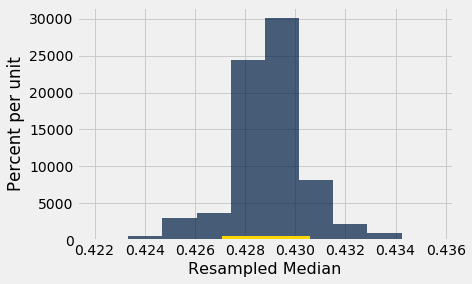

In [14]:
Table().with_column('Resampled Median', medians).hist()
plots.plot(interval_80, [0, 0], color='gold', lw=8)
print('Approx 80% Confidence Interval for Median Ratio in Population:')
print(np.round(interval_80, 3))

In [17]:
np.average(births.column('Maternal Age'))

27.228279386712096

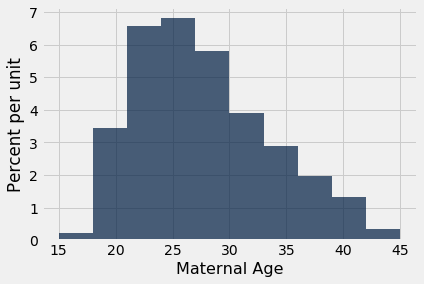

In [16]:
births.hist('Maternal Age')

## CIs for Testing 

Null Hypothesis: Average age of mothers is exactly equal to 27

Alternative Hypothesis: Average age of mothers is not equal to 27

In [18]:
# Bootstrap the sample mean

means = make_array()

for i in np.arange(5000):
    resample = births.sample()
    resampled_mean = np.average(resample.column('Maternal Age'))
    means = np.append(means, resampled_mean) 

Approx 95% Confidence Interval for Mean Maternal Age in Population:
[ 26.894  27.563]


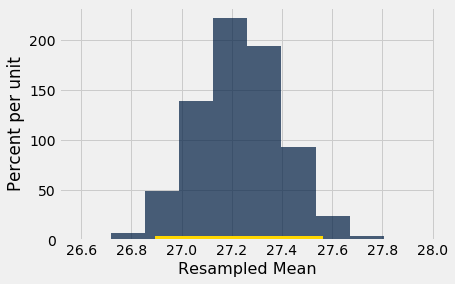

In [19]:
interval_95 = make_array(percentile(2.5, means), percentile(97.5, means))

Table().with_column('Resampled Mean', means).hist()
plots.plot(interval_95, [0, 0], color='gold', lw=8)
print('Approx 95% Confidence Interval for Mean Maternal Age in Population:')
print(np.round(interval_95, 3))